<a href="https://colab.research.google.com/github/Eshwar2916/Generative-Ai-2025/blob/main/lab_6_1_gen_ai_2303A52377.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 9407674974208.0000 - mse: 9407674974208.0000 - val_loss: 5457915674624.0000 - val_mse: 5457915674624.0000
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3355553824768.0000 - mse: 3355553824768.0000 - val_loss: 5796432707584.0000 - val_mse: 5796432707584.0000
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3468631736320.0000 - mse: 3468631736320.0000 - val_loss: 5322333749248.0000 - val_mse: 5322333749248.0000
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3256629329920.0000 - mse: 3256629329920.0000 - val_loss: 5216209469440.0000 - val_mse: 5216209469440.0000
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2872998100992.0000 - mse: 2872998100992.0000 - val_loss: 5103449276416.0000 - val_mse: 5103449276416.0000
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 3355268874240.0000 - mse: 3355268874240.0000 - val_loss: 5488608542720.0000 - val_mse: 5488608542720.0000
Epoc

Training MSE: 3073856765952.0, Testing MSE: 5250685075456.0


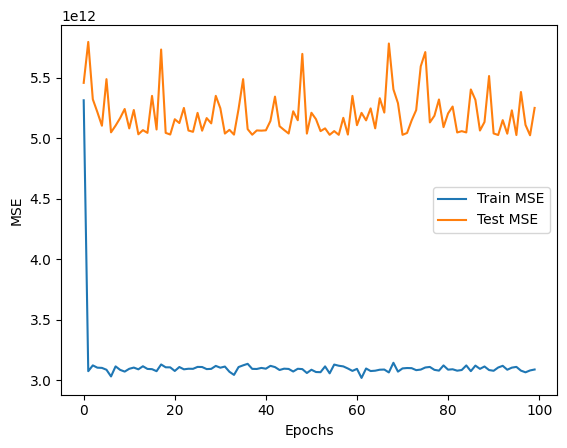

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
url = 'https://drive.google.com/uc?id=1AcdENlVm5dccNyo_vgdMbneX8YVvH5R3'
df = pd.read_csv(url)

# Check column names
print(df.columns)
df.columns = df.columns.str.strip()  # Remove any hidden spaces

# Data preprocessing
if 'Price' in df.columns:
    target_column = 'Price'
elif 'price' in df.columns:
    target_column = 'price'
else:
    raise KeyError("Target column not found. Check dataset column names.")

X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN model
model = Sequential([
    Dense(15, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(20, activation='tanh'),
    Dense(15, activation='tanh'),
    Dense(1, activation='linear')  # Regression output
])

# Compile model
model.compile(optimizer=keras.optimizers.SGD(), loss='mse', metrics=['mse'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
train_mse = model.evaluate(X_train, y_train, verbose=0)[1]
test_mse = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training MSE: {train_mse}, Testing MSE: {test_mse}')

# Save model
model.save('housing_price_model.h5')

# Plot training history
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Load and use model
def predict_price(features):
    loaded_model = keras.models.load_model('housing_price_model.h5')
    features = scaler.transform([features])  # Scale input
    return loaded_model.predict(features)[0][0]

# Example usage
# sample_features = X_test[0]  # Replace with actual sample
# print(predict_price(sample_features))